In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
df_train= pd.read_csv("../data/processed/train_w_desc.csv")

In [7]:
df_train.head(1)

,Drug_ID,Drug,Y,mol,tpsa,mol_w,qed,HBA,HBD,logP,MR
0,Drug 0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,0,<rdkit.Chem.rdchem.Mol object at 0x00000201534...,45.2,319.096508,0.434358,0,0,2.6669,70.426


In [9]:
X_train= df_train.drop(columns=["Drug_ID", "Drug", "mol", "Y"])
y_train= df_train["Y"]

In [5]:
from sklearn.linear_model import LogisticRegression

In [12]:
X_train.shape
y_train.shape

(28789,)

In [13]:
lg = LogisticRegression()

In [14]:
lg.fit(X_train, y_train)

c:\Users\Andreu\anaconda3\envs\ml_project_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
lg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [17]:
df_test= pd.read_csv("../data/processed/test_w_desc.csv")

In [18]:
X_test= df_test.drop(columns=["Drug_ID", "Drug", "mol", "Y"])
y_test= df_test["Y"]

In [20]:
X_test.shape, y_test.shape

((8225, 7), (8225,))

In [21]:
lg_y_pred= lg.predict(X_test)

In [22]:
lg_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cmat_lg= confusion_matrix(y_test, lg_y_pred)

In [26]:
cmat_lg

array([[7926,    2],
       [ 292,    5]], dtype=int64)

In [27]:
#As it could be expected, a simple classification method using only the property descriptors without
#molecular fingerprints, yielded a poor model for active compound prediction.

In [28]:
df_train_fp = pd.read_csv("../data/processed/train_morgan_1024.csv")

In [30]:
df_test_fp = pd.read_csv("../data/processed/test_morgan_1024.csv")

In [32]:
df_train_fp.head()

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_1014,Bit_1015,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
lg2= LogisticRegression()

In [33]:
lg2.fit(df_train_fp, y_train)

c:\Users\Andreu\anaconda3\envs\ml_project_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
lg2_y_pred= lg2.predict(df_test_fp)

In [35]:
cmat_lg2 = confusion_matrix(y_test, lg2_y_pred)

In [36]:
cmat_lg2

array([[7882,   46],
       [ 224,   73]], dtype=int64)

In [ ]:
#using fingerprints improved significantly, but still there is a lot of space to improve

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Recall : TP/All positives in data

f1_score : 2*(precision*recall)/(precision+recall)

In [52]:
print("Recall:", recall_score(y_test, lg_y_pred))
print("f1_score:", f1_score(y_test, lg_y_pred))
print("roc_auc:", roc_auc_score(y_test, lg_y_pred))

Recall: 0.016835016835016835
f1_score: 0.03289473684210526
roc_auc: 0.5082913732005558


In [53]:
print("Recall:", recall_score(y_test, lg2_y_pred))
print("f1_score:", f1_score(y_test, lg2_y_pred))
print("roc_auc:", roc_auc_score(y_test, lg2_y_pred))

Recall: 0.24579124579124578
f1_score: 0.35096153846153844
roc_auc: 0.6199945129057137


In [ ]:
#merging fingerprints with descriptors

In [57]:
joined_train= X_train.join(df_train_fp)

In [58]:
joined_train.head()

,tpsa,mol_w,qed,HBA,HBD,logP,MR,Bit_0,Bit_1,Bit_2,...,Bit_1014,Bit_1015,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023
0,45.20,319.096508,0.434358,0,0,2.6669,70.4260,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20.31,291.071785,0.581359,2,0,4.9890,87.3330,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,47.56,263.047808,0.790087,3,1,3.9330,65.9332,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57.53,138.031694,0.610259,3,2,1.0904,35.0661,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,172.56,397.962705,0.374691,10,0,4.1188,91.2156,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
joined_test= X_test.join(df_test_fp)

In [60]:
lg3 = LogisticRegression()

In [61]:
lg3.fit(joined_train, y_train)

c:\Users\Andreu\anaconda3\envs\ml_project_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
lg3_pred= lg3.predict(joined_test)

In [66]:
cmat_lg3 = confusion_matrix(y_test, lg3_pred)

In [67]:
cmat_lg3

array([[7897,   31],
       [ 234,   63]], dtype=int64)

In [68]:
print("Recall:", recall_score(y_test, lg3_pred))
print("f1_score:", f1_score(y_test, lg3_pred))
print("roc_auc:", roc_auc_score(y_test, lg3_pred))

Recall: 0.21212121212121213
f1_score: 0.32225063938618925
roc_auc: 0.6041055101978412


In [69]:
#the recall got a bit worse than using only the fingerprints. We can try to scale the descriptor values

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler= MinMaxScaler()

In [79]:
X_train_scaled= scaler.fit_transform(joined_train)

In [80]:
X_test_scaled = scaler.fit_transform(joined_test)

In [81]:
lg4 = LogisticRegression()

In [82]:
lg4.fit(X_train_scaled, y_train)

c:\Users\Andreu\anaconda3\envs\ml_project_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
lg4_pred = lg4.predict(X_test_scaled)

In [84]:
cmat4 = confusion_matrix(y_test, lg4_pred)

In [85]:
cmat4

array([[7880,   48],
       [ 220,   77]], dtype=int64)

In [86]:
print("Recall:", recall_score(y_test, lg4_pred))
print("f1_score:", f1_score(y_test, lg4_pred))
print("roc_auc:", roc_auc_score(y_test, lg4_pred))

Recall: 0.25925925925925924
f1_score: 0.36492890995260663
roc_auc: 0.6266023844227678


In [87]:
#Not the biggest imrovement, but the best result so far

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rnd_clf = RandomForestClassifier(n_estimators=100,
                                 max_features=5,
                                 random_state=42)
rnd_clf.fit(X_train_scaled, y_train)

y_pred_rf = rnd_clf.predict(X_test_scaled)

In [100]:
cmat_rf= confusion_matrix(y_test, y_pred_rf)

In [101]:
cmat_rf

array([[7921,    7],
       [ 235,   62]], dtype=int64)

In [103]:
print("Recall:", recall_score(y_test, y_pred_rf))
print("f1_score:", f1_score(y_test, y_pred_rf))
print("roc_auc:", roc_auc_score(y_test, y_pred_rf))

Recall: 0.20875420875420875
f1_score: 0.3387978142076503
roc_auc: 0.6039356311177704


In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
score_list= []
for i in range(1,40, 2):
    knn_ex = KNeighborsClassifier(n_neighbors=i)
    knn_ex.fit(X_train_scaled, y_train)
    knn_y= knn_ex.predict(X_test_scaled) 
    score_list.append(roc_auc_score(y_test,knn_y))

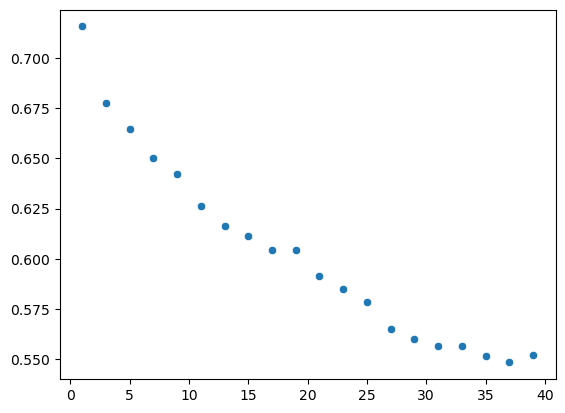

In [105]:
plt.figure()
sns.scatterplot(x= range(1,40,2), y= score_list)
plt.show()

In [107]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
knn_y= knn.predict(X_test_scaled) 
print(roc_auc_score(y_test, knn_y))

0.6775926520502706


In [108]:
cmat_knn = confusion_matrix(y_test, knn_y)

In [109]:
cmat_knn

array([[7861,   67],
       [ 189,  108]], dtype=int64)

In [106]:
from sklearn.ensemble import AdaBoostClassifier

In [113]:
ada = AdaBoostClassifier(n_estimators=50,
                             random_state=42)

ada.fit(X_train_scaled, y_train)

y_ada_pred = ada.predict(X_test_scaled)

In [114]:
def evaluation(y_test, y_pred):
    cmat = confusion_matrix(y_test, y_pred)
    print(cmat)
    print("Recall:", recall_score(y_test, y_pred))
    print("f1_score:", f1_score(y_test, y_pred))
    print("roc_auc:", roc_auc_score(y_test, y_pred))

In [115]:
evaluation(y_test, y_ada_pred)

[[7906   22]
 [ 252   45]]
Recall: 0.15151515151515152
f1_score: 0.24725274725274726
roc_auc: 0.5743700883710975


In [116]:
from sklearn.ensemble import GradientBoostingClassifier

In [117]:
gb = GradientBoostingClassifier(n_estimators=100,
                                 random_state=42)
gb.fit(X_train_scaled, y_train)


y_pred_gb = gb.predict(X_test_scaled)

In [118]:
evaluation(y_test, y_pred_gb)

[[7895   33]
 [ 226   71]]
Recall: 0.23905723905723905
f1_score: 0.35411471321695764
roc_auc: 0.617447388448902


In [121]:
!pip install xgboost

In [122]:
from xgboost import XGBClassifier

In [129]:
xgb = XGBClassifier(n_estimators= 100,
                        random_state=42)

xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

In [130]:
evaluation(y_test, y_pred_xgb)

[[7904   24]
 [ 215   82]]
Recall: 0.2760942760942761
f1_score: 0.40694789081885857
roc_auc: 0.6365335154437072


In [131]:
from xgboost import XGBRFClassifier

In [136]:
xgbrf = XGBRFClassifier(n_estimators= 10,
                        random_state=42)

xgbrf.fit(X_train_scaled, y_train)
y_pred_xgbrf = xgbrf.predict(X_test_scaled)

In [137]:
evaluation(y_test, y_pred_xgbrf)

[[7906   22]
 [ 235   62]]
Recall: 0.20875420875420875
f1_score: 0.32545931758530183
roc_auc: 0.602989616990626


In [138]:
from sklearn.svm import SVC

In [139]:
svm = SVC(kernel="linear", C= 1)
svm.fit(X_train_scaled,y_train)
y_pred_svm= svm.predict(X_test_scaled)

In [140]:
evaluation(y_test, y_pred_svm)

[[7908   20]
 [ 234   63]]
Recall: 0.21212121212121213
f1_score: 0.33157894736842103
roc_auc: 0.6047992538910805


In [141]:
svm2 = SVC(kernel="rbf", C=1)
svm2.fit(X_train_scaled,y_train)
y_pred_svm2= svm.predict(X_test_scaled)

In [142]:
evaluation(y_test, y_pred_svm2)

[[7908   20]
 [ 234   63]]
Recall: 0.21212121212121213
f1_score: 0.33157894736842103
roc_auc: 0.6047992538910805


None of the classifiers outperformed the rest. TDC library has more encoders for SMILES structures. Try that in another notebook